In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

#load data
dataSet = load_dataset('lukebarousse/data_jobs')
df = dataSet['train'].to_pandas()


#clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job-posted_month'>

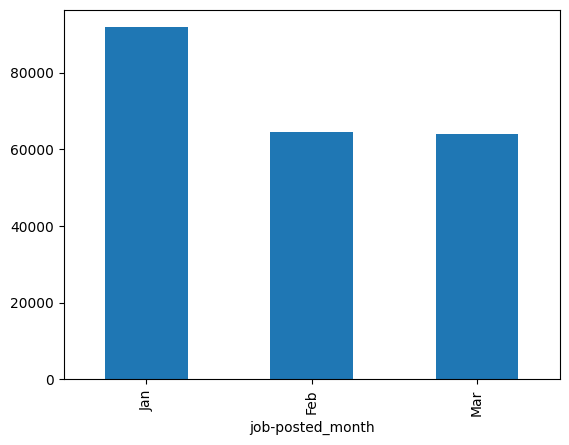

In [2]:
df['job-posted_month'] = df['job_posted_date'].dt.strftime('%b')
months = df['job-posted_month'].unique()
job_dicts={month : df[df['job-posted_month']==month] for month in months}
# concat jan feb and mar
df_q1 = pd.concat([job_dicts['Jan'], job_dicts['Feb'],job_dicts['Mar']], ignore_index=True)
df_q1['job-posted_month'].value_counts().plot(kind='bar')

In [3]:
df_q1.to_csv('qi.csv')

In [4]:
pd.read_csv('qi.csv',index_col=0)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job-posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,NaN,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,NaN,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,NaN,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,NaN,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


In [7]:
import openpyxl

df_q1.to_excel('qi.xlsx')